In [1]:
import pandas as pd
import numpy as np
import json
import pickle
import datetime as dt
import geopandas as gpd
from shapely.geometry import Point, LineString,MultiLineString,Polygon
from shapely import ops
import matplotlib.pyplot as plt
%matplotlib inline
import os
import folium
attr='(c) <a href="http://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors (c) <a href="http://cartodb.com/attributions">CartoDB</a>, CartoDB <a href ="http://cartodb.com/attributions">attributions</a>'
from selenium import webdriver
import PIL
import PIL.Image as Image
import PIL.ImageDraw as ImageDraw
import PIL.ImageFont as ImageFont
import glob
import moviepy.editor as mpy
from flask import request

In [45]:
# # Define the API endpoint
# url = "https://data.traffic.hereapi.com/v7/flow"

# # Define the query parameters
# params = {
#     "locationReferencing": "shape",
#     #"in": "bbox:107.54908372065572,-6.926620456605005,107.72967148820469,-6.896286771555365",
#     "in": "bbox:107.2510292754,-7.3097642655,107.9384321719,-6.8128449268",
#     "apiKey": "z1hUE5rH83_F6uIgubqDkRHn6JQK8s5tUa106Nudp6c",
#     "responseattributes": "sh,fc"
# }


In [46]:
"https://traffic.api.here.com/traffic/6.3/flow.json?bbox=-6.926620456605005,107.54908372065572;-6.896286771555365,107.72967148820469&apiKey=Cdfx4rTgJqyfEJv1ydzReBDhwqpkx1PymIp4UjaYWvc&responseattributes=sh,fc"

'https://traffic.api.here.com/traffic/6.3/flow.json?bbox=-6.926620456605005,107.54908372065572;-6.896286771555365,107.72967148820469&apiKey=Cdfx4rTgJqyfEJv1ydzReBDhwqpkx1PymIp4UjaYWvc&responseattributes=sh,fc'

In [1]:
# # for renaming file into jakarta, asia time from utc time 
# import os
# import shutil
# import pytz
# from datetime import datetime

# def rename_json_files(directory_path, new_directory_path):
#     # Create the new directory if it doesn't exist
#     if not os.path.exists(new_directory_path):
#         os.makedirs(new_directory_path)

#     # Get a list of all JSON files in the directory
#     json_files = [f for f in os.listdir(directory_path) if f.endswith('.json')]

#     # Loop through each JSON file
#     for json_file in json_files:
#         # Extract the UTC time from the filename
#         utc_time_str = json_file.split('.')[0]
        
#         # Parse UTC time string to datetime object
#         utc_time = datetime.strptime(utc_time_str, '%Y-%m-%d %H-%M-%S')

#         # Convert UTC time to Jakarta time
#         jakarta_tz = pytz.timezone('Asia/Jakarta')
#         jakarta_time = utc_time.replace(tzinfo=pytz.utc).astimezone(jakarta_tz)

#         # Format Jakarta time to string for the new filename
#         jakarta_time_str = jakarta_time.strftime('%Y-%m-%d %H-%M-%S')
#         new_filename = jakarta_time_str + '.json'

#         # Copy the file to the new directory with the modified filename
#         shutil.copyfile(os.path.join(directory_path, json_file), os.path.join(new_directory_path, new_filename))

#     print('Renaming complete!')


In [6]:
# rename_json_files('E:\FASTRACK\SMT10\Bandung-Traffic\json','E:\FASTRACK\SMT10\Bandung-Traffic\json_' )

Renaming complete!


In [2]:
## For delete json file that error in request
# import os
## Define the directory path
# directory_path = r'E:\FASTRACK\SMT10\Bandung-Traffic\json_'

# # Loop over all files in the directory
# for file_name in os.listdir(directory_path):
#     # Construct the full file path
#     file_path = os.path.join(directory_path, file_name)
    
#     # Check the content of the JSON file
#     with open(file_path, 'r') as f:
#         content = f.read()
#     if '"error": "Too Many Requests"' in content:
#         os.remove(file_path)
#         print(f'Removed {file_path} due to "Too Many Requests" error.')
#     else:
#         print(f'{file_path} is OK.')


In [41]:
#for translate json to dataframe
from shapely.geometry import Point, LineString
import geopandas as gpd

def dataframe (filename):
    with open(filename, 'r') as f:
        data = json.load(f)

    rows = []
    for result in data['results']:
        location = result['location']
        description = location['description']
        length = location['length']
        links = location['shape']['links']
        latitudes = []
        longitudes = []
        for link in links:
            if 'points' in link:
                for point in link['points']:
                    latitudes.append(point['lat'])
                    longitudes.append(point['lng'])
        speed = result['currentFlow']['speed']
        freeflow = result['currentFlow']['freeFlow']
        jamfactor = result['currentFlow']['jamFactor']
        rows.append([description, length, latitudes, longitudes, speed, freeflow, jamfactor])
        
    return(pd.DataFrame(rows, columns=['Description', 'Length', 'Latitudes', 'Longitudes', 'Speed', 'FreeFlow', 'JamFactor']))


In [57]:
# df = dataframe('2023-03-28 20-19-22.json')

In [49]:
# df

,Description,Length,Latitudes,Longitudes,Speed,FreeFlow,JamFactor
0,Jalan Taman Singosari Ujung/Jalan Melong Asih,93.0,"[-6.918920008465648, -6.919689970090985]","[107.56337997503579, 107.56304997950792]",5.277778,5.277778,0.0
1,Jalan Jenderal Ahmad Yani,164.0,"[-6.901899967342615, -6.901920000091195, -6.90...","[107.65356003306806, 107.65380998142064, 107.6...",5.833334,8.333334,1.9
2,Jalan Cisaat,48.0,"[-6.941419970244169, -6.941130040213466, -6.94...","[107.53402998670936, 107.53412998281419, 107.5...",4.444445,4.444445,0.0
3,Jalan Sunda,49.0,"[-6.915920041501522, -6.915909983217716, -6.91...","[107.61835997924209, 107.61831002309918, 107.6...",6.666667,6.944445,0.4
4,Jalan Elang Raya,18.0,"[-6.915549980476499, -6.915609994903207]","[107.57482999004424, 107.574980026111]",3.888889,2.777778,0.0
...,...,...,...,...,...,...,...
2328,Jalan M. K. Wiganda Sasmita,58.0,"[-6.8698700331151485, -6.8703000247478485]","[107.54390001296997, 107.54360002465546]",4.722222,5.833334,0.3
2329,Jalan Terusan,170.0,"[-6.870059967041016, -6.870149988681078, -6.87...","[107.54414996132255, 107.54425004124641, 107.5...",5.277778,5.555556,0.3
2330,Jalan Terusan,367.0,"[-6.872619967907667, -6.8724300339818, -6.8724...","[107.54131997935474, 107.54137999378145, 107.5...",5.555556,6.388889,0.3
2331,Jalan Pojok Utara/Jalan Sisingamangaraja,268.0,"[-6.873030010610819, -6.872920040041208, -6.87...","[107.54118000157177, 107.5409800093621, 107.54...",7.222222,9.722222,1.5


In [50]:
##to make longlat into geodataframe format
# geometry = [LineString(list(zip(row['Longitudes'], row['Latitudes']))) for _, row in df.iterrows()]
# gdf = gpd.GeoDataFrame(df, geometry=geometry)
# gdf.crs = {'init':'epsg:4326'}


In [51]:
# gdf.head()

,Description,Length,Latitudes,Longitudes,Speed,FreeFlow,JamFactor,geometry
0,Jalan Taman Singosari Ujung/Jalan Melong Asih,93.0,"[-6.918920008465648, -6.919689970090985]","[107.56337997503579, 107.56304997950792]",5.277778,5.277778,0.0,"LINESTRING (107.56338 -6.91892, 107.56305 -6.9..."
1,Jalan Jenderal Ahmad Yani,164.0,"[-6.901899967342615, -6.901920000091195, -6.90...","[107.65356003306806, 107.65380998142064, 107.6...",5.833334,8.333334,1.9,"LINESTRING (107.65356 -6.90190, 107.65381 -6.9..."
2,Jalan Cisaat,48.0,"[-6.941419970244169, -6.941130040213466, -6.94...","[107.53402998670936, 107.53412998281419, 107.5...",4.444445,4.444445,0.0,"LINESTRING (107.53403 -6.94142, 107.53413 -6.9..."
3,Jalan Sunda,49.0,"[-6.915920041501522, -6.915909983217716, -6.91...","[107.61835997924209, 107.61831002309918, 107.6...",6.666667,6.944445,0.4,"LINESTRING (107.61836 -6.91592, 107.61831 -6.9..."
4,Jalan Elang Raya,18.0,"[-6.915549980476499, -6.915609994903207]","[107.57482999004424, 107.574980026111]",3.888889,2.777778,0.0,"LINESTRING (107.57483 -6.91555, 107.57498 -6.9..."


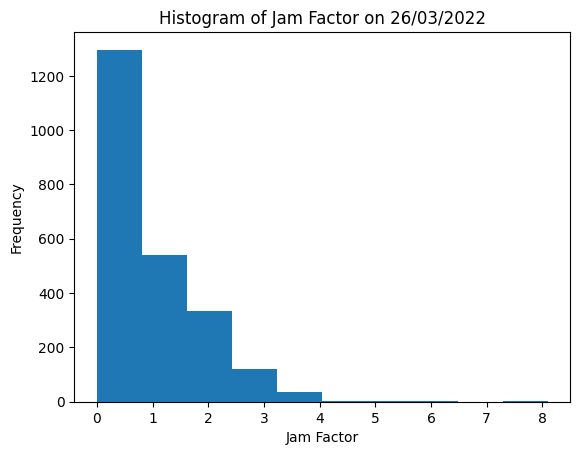

In [52]:
##to plot jam factor 
# import matplotlib.pyplot as plt

# # Create a histogram plot
# plt.hist(gdf['JamFactor'], bins=10)

# # Set the title and labels
# plt.title('Histogram of Jam Factor on 26/03/2022')
# plt.xlabel('Jam Factor')
# plt.ylabel('Frequency')

# # Show the plot
# plt.show()


In [58]:
# bin_edges = [-1, 1, 3, 4, 8, 11]

# # use pd.cut to categorize the 'jamFactor' column
# gdf['jamFactor_category'] = pd.cut(gdf['JamFactor'], bins=bin_edges)

# gdf['group'] = gdf['jamFactor_category']
# # print the count of observations in each category
# print(gdf['group'].value_counts())

NameError: name 'gdf' is not defined

<Axes: >

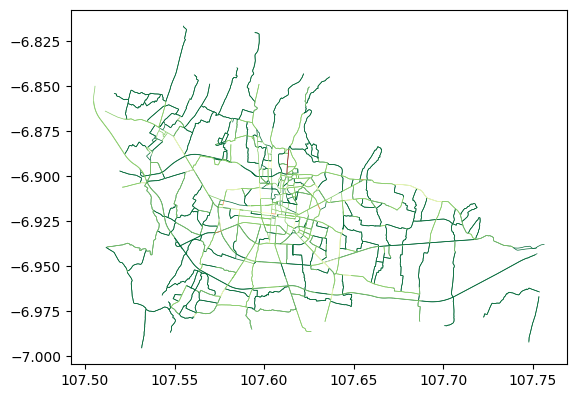

In [54]:
# gdf.sort_values("JamFactor").plot(column="group", cmap='RdYlGn_r', categorical=True, linewidth=.5)

In [55]:
# gdf['jamFactor_category']

0       (-1, 1]
1        (1, 3]
2       (-1, 1]
3       (-1, 1]
4       (-1, 1]
         ...   
2328    (-1, 1]
2329    (-1, 1]
2330    (-1, 1]
2331     (1, 3]
2332    (-1, 1]
Name: jamFactor_category, Length: 2333, dtype: category
Categories (5, interval[int64, right]): [(-1, 1] < (1, 3] < (3, 4] < (4, 8] < (8, 11]]

In [37]:
# To plot on map on folium 
def plot_lines_on_folium(gdf, fname, center_lat, center_lon, zoom_start):
    # convert JamFactor_category column to string
    #gdf['jamFactor_category'] = gdf['jamFactor_category'].astype(str)
    #gdf['rounded_speed'] = gdf['Speed'].round()
    gdf['group'] = gdf['group'].astype(str)
    
    # create map centered at specified latitude and longitude
    map_center = [center_lat, center_lon]
    m = folium.Map(location=map_center, zoom_start=zoom_start,tiles='CartoDB dark_matter')

    # Define the colors using RGB values
    color_dict = {
        '(-1, 1]': '#008000',
        '(1, 3]': '#7fff00',
        '(3, 4]': '#ffff00',
        '(4, 8]': '#ffa500',
        '(8, 11]': '#ff0000'
    }

    for idx, row in gdf.iterrows():
        color = None
        weight = None
        if row['group'] in color_dict:
            color = color_dict[row['group']]
            weight = 7
            print (f"Row {idx} assigned color {color} and weight {weight}") #checking
        else:
            print(f"Row{idx} has invalid group {row['group']}") #checking 

        if color and weight:
            folium.features.PolyLine(locations=row['geometry'].coords, color=color, weight = weight).add_to(m)
            print(f"Adding PolyLine with color {color}") #checking 
    
    legend_html = '''
        <div style="position: fixed; bottom: 50px; left: 50px; z-index:9999; font-size:14px; background-color:white; padding: 10px; border: 1px solid grey;">
            <p><strong>Jam Factor Categories:</strong></p>
            <p><span style="color:#008000;">(-1, 1]</span>: Free Flow</p>
            <p><span style="color:#7fff00;">(1, 3]</span>: Low</p>
            <p><span style="color:#ffff00;">(3, 4]</span>: Medium</p>
            <p><span style="color:#ffa500;">(4, 8]</span>: High</p>
            <p><span style="color:#ff0000;">(8, 11]</span>: Very High</p>
        </div>
    '''
    m.get_root().html.add_child(folium.Element(legend_html))

    # save map as HTML file
    m.save(f'{fname}')


In [42]:
# main function 
def process_here_maps_outputs(directory_path, output_dir):
    # Get a list of all JSON files in the directory
    json_files = glob.glob(os.path.join(directory_path, '*.json'))

    for json_file in json_files:
        # Process each JSON file using the existing logic
        try: 
            df = dataframe(json_file)
        except:
            continue
        if df is not None:
            geometry = [LineString(list(zip(row['Latitudes'], row['Longitudes']))) for _, row in df.iterrows()]
            gdf = gpd.GeoDataFrame(df, geometry=geometry)
            gdf.crs = {'init':'epsg:4326'} 
            bin_edges = [-1, 1, 3, 4, 8, 11]
            gdf['jamFactor_category'] = pd.cut(gdf['JamFactor'], bins=bin_edges)
            gdf['group'] = gdf['jamFactor_category']
            #gdf.sort_values("JamFactor").plot(column="group", cmap='RdYlGn_r', categorical=True, linewidth=.5)
            html_filename = os.path.splitext(os.path.basename(json_file))[0] + '.html'
            html_path = os.path.join(output_dir, html_filename)
            plot_lines_on_folium(gdf, html_path, -6.905977, 107.613144, 13)

In [45]:
process_here_maps_outputs('E:\FASTRACK\SMT10\Bandung-Traffic', 'E:\FASTRACK\SMT10\Bandung-Traffic\html')

In [6]:
# export html files (folium map) to png 
import os
from selenium import webdriver
from time import sleep

def process_html_files(html_folder_path, screenshot_folder_path):
    # Get a list of all HTML files in the directory
    html_files = [f for f in os.listdir(html_folder_path) if f.endswith('.html')]

    for html_file in html_files:
        # Construct the file paths for the HTML and screenshot files
        html_file_path = os.path.join(html_folder_path, html_file)
        screenshot_file_path = os.path.join(screenshot_folder_path, os.path.splitext(html_file)[0] + ".png")

        # Open Chrome browser using Selenium web driver
        options = webdriver.ChromeOptions()
        options.add_argument('--ignore-certificate-errors')
        options.add_argument('--ignore-ssl-errors')
        driver = webdriver.Chrome(options=options)
        driver.get(os.path.abspath(html_file_path))

        # Wait for specified delay to ensure webpage has fully loaded
        sleep(5)

        # Maximize window and take screenshot
        driver.maximize_window()
        driver.save_screenshot(screenshot_file_path)

        # Close browser
        driver.quit()

        print(f"Screenshot saved as {screenshot_file_path}")

In [7]:
html_folder_path = 'E:\FASTRACK\SMT10\Bandung-Traffic\HTML'
screenshot_folder_path = 'E:\FASTRACK\SMT10\Bandung-Traffic\PNG'
process_html_files(html_folder_path, screenshot_folder_path)


Screenshot saved as E:\FASTRACK\SMT10\Bandung-Traffic\PNG\2023-03-26 16-22-34.png
Screenshot saved as E:\FASTRACK\SMT10\Bandung-Traffic\PNG\2023-03-28 20-15-02.png
Screenshot saved as E:\FASTRACK\SMT10\Bandung-Traffic\PNG\2023-03-28 20-17-08.png
Screenshot saved as E:\FASTRACK\SMT10\Bandung-Traffic\PNG\2023-03-28 20-19-22.png
